=== 5(a) Correlation Matrix ===
              followers     likes    shares  num_comments
followers      1.000000  0.064813  0.011604      0.104815
likes          0.064813  1.000000  0.357393      0.501219
shares         0.011604  0.357393  1.000000      0.208426
num_comments   0.104815  0.501219  0.208426      1.000000


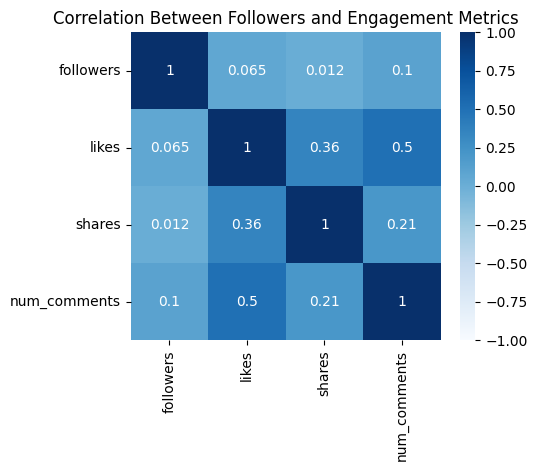


=== 5(b) Average Engagement by Source ===
source
TWITTER    193.913995
Name: total_engagement, dtype: float64


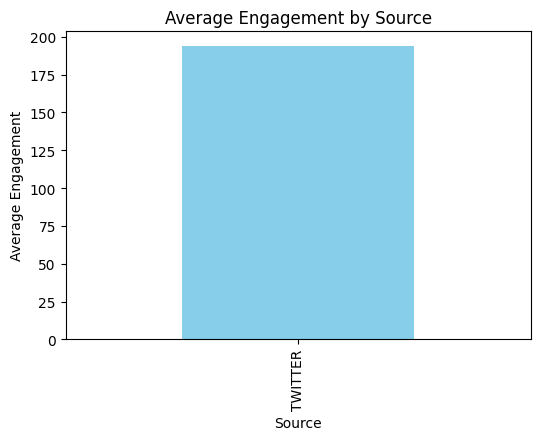

In [7]:
# Replace 'ola.json' with your actual file path if needed
# Data handling
import json
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment analysis (TextBlob)
# !pip install textblob --quiet  # run this only once in a notebook cell to install
from textblob import TextBlob

# For handling the mode calculation
from statistics import mode

# (Optional) to suppress warnings in a notebook
import warnings
warnings.filterwarnings('ignore')
file_path = 'ola.json'
with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)
# 5(a) Correlation between the number of followers and engagement metrics
#     We will look at 'followers', 'likes', 'shares', and 'num_comments'.
df['num_comments'] = df['comments'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df['total_engagement'] = df['likes'] + df['shares'] + df['num_comments']
corr_cols = ['followers', 'likes', 'shares', 'num_comments']

# Create a correlation matrix using Pearson correlation
corr_matrix = df[corr_cols].corr(method='pearson')
print("=== 5(a) Correlation Matrix ===")
print(corr_matrix)

# Optional: visualize the correlation with a heatmap
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title("Correlation Between Followers and Engagement Metrics")
plt.show()

# 5(b) Identify patterns in engagement based on the source of posts
#     We assume there's a 'source' column (e.g., 'TWITTER', 'INSTAGRAM', etc.)
#     and a 'total_engagement' column (likes + shares + num_comments).

engagement_by_source = df.groupby('source')['total_engagement'].mean().sort_values(ascending=False)

print("\n=== 5(b) Average Engagement by Source ===")
print(engagement_by_source)

# Visualize the average engagement by source
plt.figure(figsize=(6,4))
engagement_by_source.plot(kind='bar', color='skyblue')
plt.title("Average Engagement by Source")
plt.ylabel("Average Engagement")
plt.xlabel("Source")
plt.show()